## Importing Required Libraries:

In [118]:
import tensorflow.python.keras.backend as K
sess = K.get_session()
import pandas as pd
import numpy as np
import time
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait

In [70]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

## Conversation Starter:

In [147]:
def greetings():
    print('Hey!')
    print('*********************************************************')
    print("I'm Probot. How may I help you?")
    print('*********************************************************')
    product_name = str(input("Enter the product you want to review:"))
    return product_name

## Getting Amazon Website:

In [148]:
driver = webdriver.Chrome(executable_path='C:\Windows\chromedriver')
driver.get('https://www.amazon.in/')

In [149]:
input_field = driver.find_element_by_id('twotabsearchtextbox')
prod_name = greetings()
input_field.send_keys(prod_name)
driver.find_element_by_id('nav-search-submit-button').click()

Hey!
*********************************************************
I'm Probot. How may I help you?
*********************************************************
Enter the product you want to review:one plus 8


## Searching for the Input Product:

In [150]:
product = driver.find_element_by_class_name('s-card-container')
product_link = product.find_element_by_tag_name('a')
product_link.click()

In [151]:
driver.switch_to.window(driver.window_handles[1])

In [152]:
driver.find_element_by_link_text('See all reviews').click()

## Getting all the Customer Reviews for the Product:

In [153]:
reviews = []

In [154]:
def get_reviews(): 
    all_reviews = driver.find_elements_by_class_name('review-text')
    for review in all_reviews:
        reviews.append(review.text)

In [155]:
get_reviews()
next_page = True
while(next_page):
    if len(reviews)>=50:
        break
    try:
        driver.find_element_by_id('cm_cr-pagination_bar').find_element_by_class_name('a-last').find_element_by_tag_name('a').click()
        time.sleep(6)
        get_reviews()
    except:
        next_page = False

In [156]:
reviews = list(set(reviews))

In [157]:
reviews

['',
 'Dislike- camera',
 "First let me give a review of the mobile. I bought 8 and 128gb version. Overall is good. But it says it's fast charging but to charge it from 20% to 100% it's taking more than 2 hours. And with moderate use the battery will last for 30 odd hours, including the night time when we are not using it atall. Got the product on 30th October. After using for 2days suddenly the display was not working properly and after 10-15minutes it went totally blank. Now nothing is visible. Display totally gone.\nTried to raise a replacement but as per Amazon a technical person will visit and check, and after his report they will proceed further. Ok, no issues with this, but the slot they gave is after 5days. They are delevering your product in 1day after you have ordered, but if there is any issue , them they are taking more than a week to replace it. That's not acceptable. Let's see what happens after the technician visit. Will provide the next update\n\nGot the new phone after

In [158]:
for i in range(len(reviews)):
    reviews[i] = reviews[i].replace('\n','').strip()

In [76]:
for review in reviews[1:]:
    print(str(review))
    break

Bought it on the first day of launch. Delivered the next day. Very fast delivery by Amazon. Have been using it for last two days.Pros1. Phone has glass at the back which gives it a premium look. Feels stylish to carry it along.2. As usual, Samsung screen is smooth. Good picture clarity.3. Adaptive brightness 8s one of the best I've come across till date.4. Phone is very light.5. Camera quality is also very good. Front camera is also decent.6. Battery life is more than 24hrs for regular browsing over 24*7 wifi connection.7. Fingerprint sensor on right side is handy.Cons1. Charger is only 15 Watt. 25/30 Watt would have been better.2. Nothing else as of now.I feel good holding and using this Phone. If there is any chance then I'll update the review.


In [159]:
reviews='~'.join(reviews)

In [160]:
reviews

"~Dislike- camera~First let me give a review of the mobile. I bought 8 and 128gb version. Overall is good. But it says it's fast charging but to charge it from 20% to 100% it's taking more than 2 hours. And with moderate use the battery will last for 30 odd hours, including the night time when we are not using it atall. Got the product on 30th October. After using for 2days suddenly the display was not working properly and after 10-15minutes it went totally blank. Now nothing is visible. Display totally gone.Tried to raise a replacement but as per Amazon a technical person will visit and check, and after his report they will proceed further. Ok, no issues with this, but the slot they gave is after 5days. They are delevering your product in 1day after you have ordered, but if there is any issue , them they are taking more than a week to replace it. That's not acceptable. Let's see what happens after the technician visit. Will provide the next updateGot the new phone after 10days. It was

In [162]:
reviews=bytes(reviews, 'utf-8')

In [163]:
with open('reviews.txt', 'wb') as f:
    f.write(reviews)

In [164]:
with open('reviews.txt', 'rb') as f:
    text = f.read().decode('utf-8')
    reviews_list = text.split('~')
f.close()
reviews_list

['',
 'Dislike- camera',
 "First let me give a review of the mobile. I bought 8 and 128gb version. Overall is good. But it says it's fast charging but to charge it from 20% to 100% it's taking more than 2 hours. And with moderate use the battery will last for 30 odd hours, including the night time when we are not using it atall. Got the product on 30th October. After using for 2days suddenly the display was not working properly and after 10-15minutes it went totally blank. Now nothing is visible. Display totally gone.Tried to raise a replacement but as per Amazon a technical person will visit and check, and after his report they will proceed further. Ok, no issues with this, but the slot they gave is after 5days. They are delevering your product in 1day after you have ordered, but if there is any issue , them they are taking more than a week to replace it. That's not acceptable. Let's see what happens after the technician visit. Will provide the next updateGot the new phone after 10day

## Training Model on Amazon Review Dataset:

In [19]:
import tensorflow_datasets as tfds
data = tfds.load('amazon_us_reviews/Mobile_Electronics_v1_00', split='train', shuffle_files=True)

In [20]:
import tensorflow as tf
assert isinstance(data, tf.data.Dataset)
print(data)

<_OptionsDataset shapes: {data: {customer_id: (), helpful_votes: (), marketplace: (), product_category: (), product_id: (), product_parent: (), product_title: (), review_body: (), review_date: (), review_headline: (), review_id: (), star_rating: (), total_votes: (), verified_purchase: (), vine: ()}}, types: {data: {customer_id: tf.string, helpful_votes: tf.int32, marketplace: tf.string, product_category: tf.string, product_id: tf.string, product_parent: tf.string, product_title: tf.string, review_body: tf.string, review_date: tf.string, review_headline: tf.string, review_id: tf.string, star_rating: tf.int32, total_votes: tf.int32, verified_purchase: tf.int64, vine: tf.int64}}>


In [28]:
df = tfds.as_dataframe(data)
df.head()

,data/customer_id,data/helpful_votes,data/marketplace,data/product_category,data/product_id,data/product_parent,data/product_title,data/review_body,data/review_date,data/review_headline,data/review_id,data/star_rating,data/total_votes,data/verified_purchase,data/vine
0,b'20980074',0,b'US',b'Mobile_Electronics',b'B00D1847NE',b'274617424',b'Teenage Mutant Ninja Turtles Boombox CD Play...,b'Does not work',b'2015-01-09',b'One Star',b'R1OVS0D6SEXPW7',1,0,0,1
1,b'779273',0,b'US',b'Mobile_Electronics',b'B00KMO6DYG',b'397452138',b'4 Gauge Amp Kit Amplifier Install Wiring Com...,b'This is a great wiring kit i used it to set ...,b'2015-08-06',b'Great kit',b'R9VSD0ET8FERB',4,0,0,1
2,b'15410531',0,b'US',b'Mobile_Electronics',b'B000GWLL0K',b'948304826',b'Travel Wall Charger fits Creative Zen Vision...,b'It works great so much faster than USB charg...,b'2007-03-15',b'A/C Charger for Creative Zen Vision M',b'R3ISXCZHWLJLBH',5,0,0,1
3,b'27389005',0,b'US',b'Mobile_Electronics',b'B008L3JE6Y',b'466340015',b'High Grade Robust 360\xc2\xb0 Adjustable Car...,b'This product was purchased to hold a monitor...,b'2013-07-30',b'camera stand',b'R1TWVUDOFJSQAW',5,0,0,1
4,b'2663569',0,b'US',b'Mobile_Electronics',b'B00GHZS4SC',b'350592810',b'HDE Multifunctional Bluetooth FM Audio Car K...,"b""it works but it has really bad sound quality...",b'2014-12-31',b'bad sound quality',b'R2PEOEUR1LP0GH',3,0,0,1


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   short_review  50000 non-null  object
 1   sentiment     50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [29]:
df['sentiment'] = df['data/star_rating'].apply(lambda score: 'positive' if score>=3 else 'negative')
df['sentiment'] = df['sentiment'].map({'positive':1, 'negative':0})
df['short_review'] = df['data/review_body'].str.decode('utf-8')
df = df[['short_review', 'sentiment']]

In [30]:
n = 54975
df.drop(df.tail(n).index,inplace = True)

c:\users\saksh\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [31]:
df.head()

,short_review,sentiment
0,Does not work,0
1,This is a great wiring kit i used it to set up...,1
2,It works great so much faster than USB charger...,1
3,This product was purchased to hold a monitor o...,1
4,it works but it has really bad sound quality. ...,1


## Preprocessing Review Data:

In [32]:
def preprocess(txt):
    txt = re.sub(r"[^a-zA-Z0-9]", " ", txt)
    txt = txt.split()
    filtered_txt = []
    for word in txt:
        if word not in stop_words and len(word)>2:
            filtered_txt.append(word)
    filtered_txt = [lemmatizer.lemmatize(w) for w in filtered_txt if len(w)>1]
    filtered_txt = " ".join(u for u in filtered_txt if u not in ("?", ".", ";", ":",  "!",'"')) 
    return filtered_txt

stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
df['short_review'] = df['short_review'].apply(lambda x: preprocess(x))

<ipython-input-32-02cd19f092d9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['short_review'] = df['short_review'].apply(lambda x: preprocess(x))


In [33]:
df.head()

,short_review,sentiment
0,Does work,0
1,This great wiring kit used set Pyle 2000 watt ...,1
2,work great much faster USB charger Buy You glad,1
3,This product purchased hold monitor desk conne...,1
4,work really bad sound quality bass work almost,1


In [105]:
x = df['short_review'].values
y = df['sentiment'].values

In [106]:
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(x, y, test_size=0.3)

In [107]:
tfidf_vectorizer= TfidfVectorizer(max_features=1500,min_df=5,max_df=0.7,stop_words=stopwords.words('english'))
tfidf_train=tfidf_vectorizer.fit_transform(train_sentences)
tfidf_test=tfidf_vectorizer.transform(test_sentences)

In [108]:
count_vectorizer= CountVectorizer()
count_train=count_vectorizer.fit_transform(train_sentences)
count_test=count_vectorizer.transform(test_sentences)

In [109]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
classifier=MultinomialNB()

In [110]:
classifier = MultinomialNB()
classifier.fit(tfidf_train, train_labels)
y_pred = classifier.predict(tfidf_test)
score=metrics.accuracy_score(test_labels,y_pred)
print(score)

0.8444


In [123]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing import sequence
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [124]:
max_words = 1000
max_len = 100
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(train_sentences)
sequences = tok.texts_to_sequences(train_sentences)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
test_sequences = tok.texts_to_sequences(test_sentences)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [172]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tok, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [125]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [126]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 100)]             0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 100, 50)           50000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                

In [127]:
model.fit(sequences_matrix,train_labels,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
219/219 [==============================] - 31s 142ms/step - loss: 0.3767 - accuracy: 0.8387 - val_loss: 0.2904 - val_accuracy: 0.8733
Epoch 2/10
219/219 [==============================] - 29s 135ms/step - loss: 0.2868 - accuracy: 0.8812 - val_loss: 0.2971 - val_accuracy: 0.8763


## Saving Model:

In [171]:
model.save('sentiment_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: sentiment_model\assets


INFO:tensorflow:Assets written to: sentiment_model\assets


In [129]:
model.evaluate(test_sequences_matrix,test_labels)

469/469 [==============================] - 10s 21ms/step - loss: 0.3005 - accuracy: 0.8716


[0.3005327582359314, 0.8715999722480774]

## Making Predictions:

In [143]:
predictions = model.predict(example_sequences_matrix)
pred = []
for i in predictions:
    if i[0]>0.5:
        pred.append(1)
    else:
        pred.append(0)

In [144]:
pred

[0]

In [142]:
example1 = "The worst phone I've ever purchased!1.Battery: very poor, battery drains quickly and takes 2.5 hours to fully charge a phone in idle mode. False commitment of fast changing and useless 5000mah battery!2.The phone keeps getting hang, if using 3-4 apps simultaneously."
example1 = pd.Series(preprocess(example1))
example_sequences = tok.texts_to_sequences(example1)
example_sequences_matrix = sequence.pad_sequences(example_sequences,maxlen=max_len)

In [50]:
example = "The worst phone I've ever purchased!1.Battery: very poor, battery drains quickly and takes 2.5 hours to fully charge a phone in idle mode. False commitment of fast changing and useless 5000mah battery!2.The phone keeps getting hang, if using 3-4 apps simultaneously."
example = pd.Series(preprocess(example))
example = tfidf_vectorizer.transform(example)
example

<1x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [51]:
classifier.predict(example)

array([0], dtype=int64)

In [145]:
def predict_sentiment(reviews):
    final_sequences = tok.texts_to_sequences(reviews)
    final_sequences_matrix = sequence.pad_sequences(final_sequences,maxlen=max_len)
    predictions = model.predict(final_sequences_matrix)
    pred = []
    for i in predictions:
        if i[0]>0.5:
            pred.append(1)
        else:
            pred.append(0)
    return pred

In [165]:
predictions = pd.DataFrame({'Predictions': predict_sentiment(reviews_list)})

In [166]:
predictions

,Predictions
0,1
1,1
2,0
3,0
4,0
5,0
6,1
7,0
8,1
9,0


## Visualizing Predicted Sentiments:

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

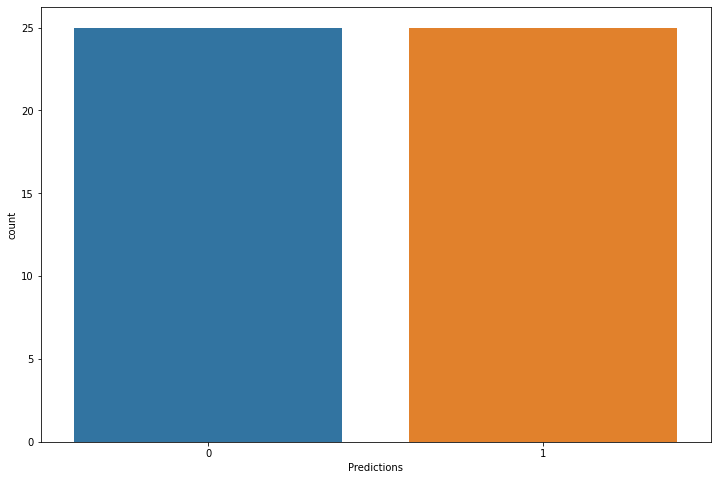

In [169]:
plt.figure(figsize=(12,8))
sns.countplot(x='Predictions', data=predictions)
plt.show()

## Final Recommendation for the User:

In [170]:
print('Sorry to keep you waiting...')
print('*******************************************************************')
print('Your Probot is here with the results!!!')
print('*******************************************************************')
if predictions['Predictions'].value_counts()[0]/len(predictions)*100>=60:
    print('This product is a good choice according to the reviews and you may buy it.')
else:
    print('This product has a lot of negative reviews. Therefore, it is suggested not to buy this product as far as\
    customer reviews are considered')
print('*******************************************************************')
print('I hope you liked the service. Come back soon with another product :)')
print('*******************************************************************')
print('Thank You!')

Sorry to keep you waiting...
*******************************************************************
Your Probot is here with the results!!!
*******************************************************************
This product has a lot of negative reviews. Therefore, it is suggested not to buy this product as far as    customer reviews are considered
*******************************************************************
I hope you liked the service. Come back soon with another product :)
*******************************************************************
Thank You!
